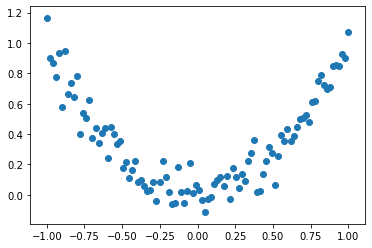

In [2]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
"""
tf回归：y=x^2
"""
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise    # y = x^2 + noise                      # shape (100, 1) + some noise

# plot data
plt.scatter(x, y) # 画散点图

plt.show()



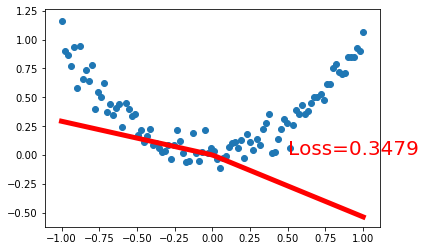

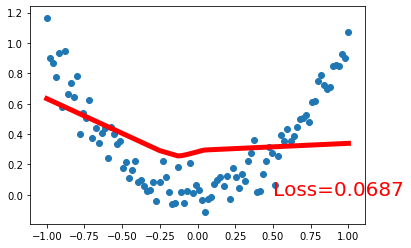

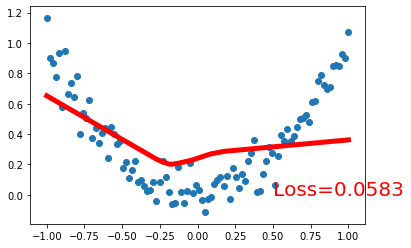

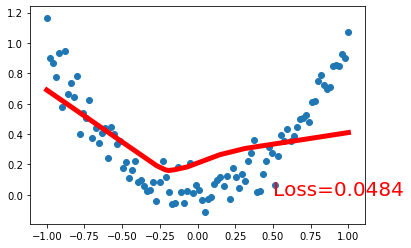

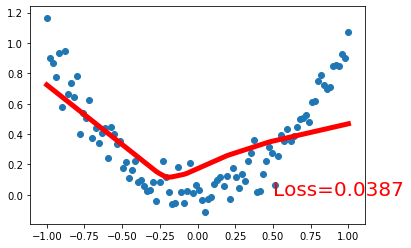

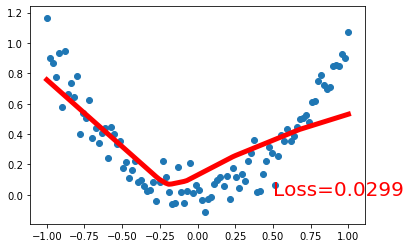

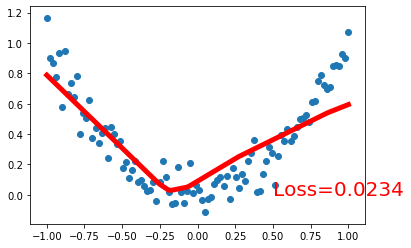

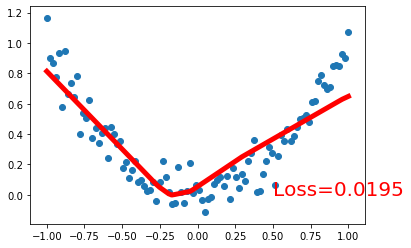

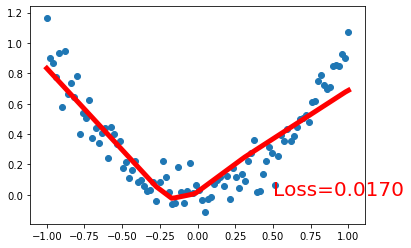

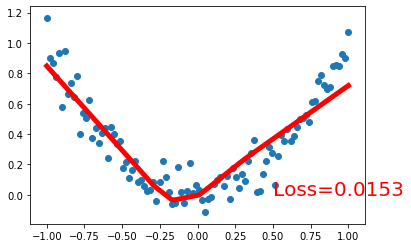

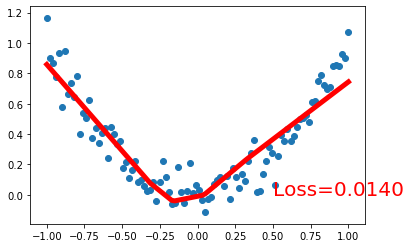

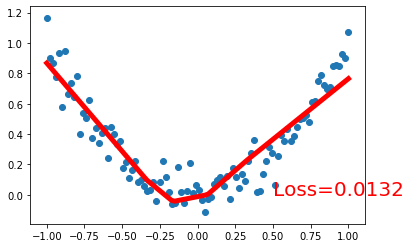

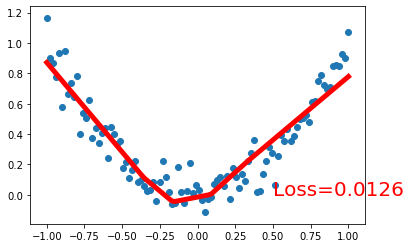

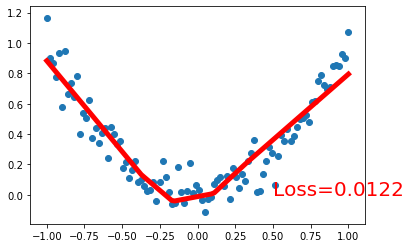

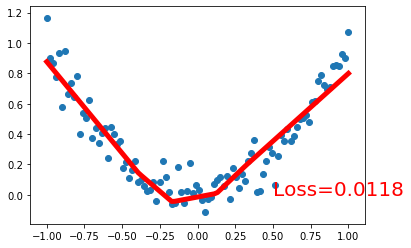

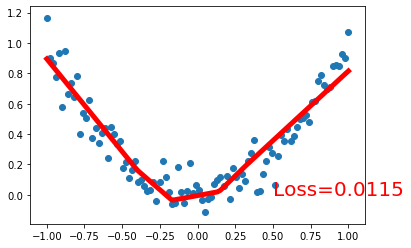

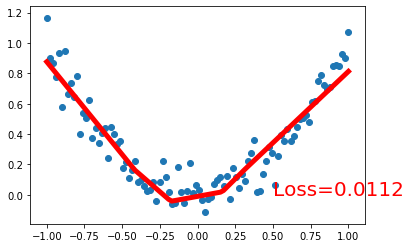

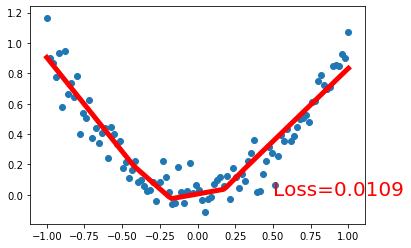

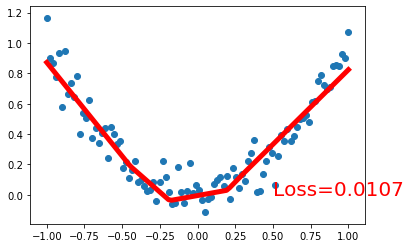

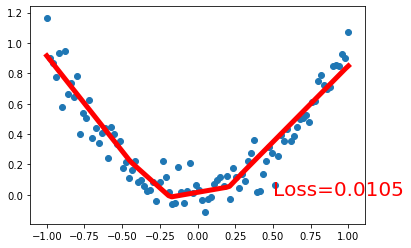

In [3]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x，占位符tf_x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y, 占位符tf_y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer, 全连接层，隐藏层
output = tf.layers.dense(l1, 1)                     # output layer, 全连接层，输出层

loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost 计算mse损失函数
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)  # 梯度下降优化器
train_op = optimizer.minimize(loss)

sess = tf.Session()                                 # control training and others 创建会话
sess.run(tf.global_variables_initializer())         # initialize var in graph     初始化

plt.ion()   # something about plotting              # 开启交互模式

for step in range(100):                             # 循环
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})    # 训练、计算损失值、得到网络输出
    if step % 5 == 0:        # 每5步
        # plot and show learning process
        plt.cla()            # 清空轴
        plt.scatter(x, y)    # 画散点图
        plt.plot(x, pred, 'r-', lw=5)    # 画折线图
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})   # 注释
        plt.pause(0.1)      # 暂停0.1s, 达到动态效果

plt.ioff()                  # 关闭交互模式
plt.show()                  # 显示图片